
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

Some of the important variables for example_traditional:

- *TECHNOLOGY*: 5 nm
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 16 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *GLOBAL_CYCLE_SECONDS*: 1e-09 clock period

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!



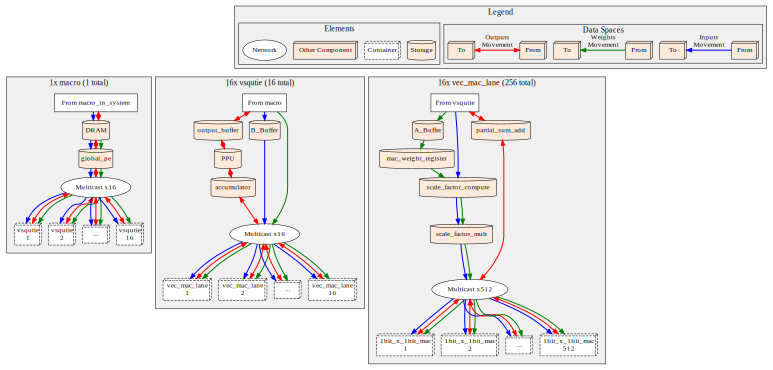

In [65]:
from _tests import scripts
from scripts.notebook_utils import *

display_markdown(
    f"""
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

{get_important_variables_markdown('example_traditional')}

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!

"""
)
display_diagram(get_diagram("example_traditional", ignore=DIAGRAM_DEFAULT_IGNORE))

In [66]:
result = run_test("example_traditional", "test_area_energy_breakdown")
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_energy')*1e15 for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown",
    ax=axs[0]
)
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_area')*1e12 for r in result},
    ylabel="Area (um^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)


   ### Area and energy breakdown
   This example architecture doesn't have a suite of tests, but you may
   look at the other example architectures for inspiration.        
   

RuntimeError: 

========================================================================================================================
Timeloop mapper failed with return code 134. Please check the output files in /home/workspace/scripts/../outputs/548.281473243071520 for more information. To debug, you can edit the file:
	/home/workspace/scripts/../outputs/548.281473243071520/parsed-processed-input.yaml
and run 
	tl mapper /home/workspace/scripts/../outputs/548.281473243071520/parsed-processed-input.yaml
to see the error. If you're running the mapper and Timeloop can't find a vaild mapping, try setting 'diagnostics: true' in the mapper input specification.

In [67]:
!tl mapper /home/workspace/scripts/../outputs/548.281473243071520/parsed-processed-input.yaml

Running apps: mapper
Found parsed-processed-input.yaml in input files. Running Timeloop without parsing or processing steps. If this is not the intended behavior, please name the input files differently.
input file: /home/workspace/outputs/548.281473243071520/parsed-processed-input.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
timeloop-mapper: include/model/attribute.hpp:62: T model::Attribute<T>::Get() const [with T = long unsigned int]: Assertion `specified_' failed.
Aborted
